[**Demo %s**](#demo-diffadv-advdiff)


The first step is to define a discretization of the domain and the initial state.

In [2]:
m = 50;  n = 40;
[x, Dx, Dxx] = diffcheb(m, [-1, 1]);
[y, Dy, Dyy] = diffcheb(n, [-1, 1]);
[mtx, X, Y] = tensorgrid(x, y);
u_init = @(x, y) (1+y) .* (1-x).^4 .* (1+x).^2 .* (1-y.^4);

There are really two grids now: the full grid and the subset grid of interior points. Since the IVP unknowns are on the interior grid, that is the one we need to change shapes on. We also need the functions `extend` and `chop` to add and remove boundary values.

In [3]:
[~, ~, ~, vec, unvec] = tensorgrid(x(2:m), y(2:n));
chop = @(U) U(2:m, 2:n);
z = zeros(1, n-1);
extend = @(U) [ zeros(m+1, 1) [z; U; z] zeros(m+1, 1)];
pack = @(U) vec(chop(U));
unpack = @(u) extend(unvec(u));

Now we can define and solve the IVP using a stiff solver.

```{literalinclude} f13_2_advdiff.m
:language: matlab
```

In [4]:
ivp = ode(ODEFcn=@f13_2_advdiff);
ivp.InitialTime = 0;
ivp.InitialValue = pack(mtx(u_init));
ivp.Parameters = {0.05, Dx, Dxx, Dy, Dyy, pack, unpack};
ivp.Solver = "stiff";
sol = solutionFcn(ivp, 0, 2);

When we evaluate the solution at a particular value of $t$, we get a vector of the interior grid values. The same `unpack` function above converts this to a complete matrix of grid values.

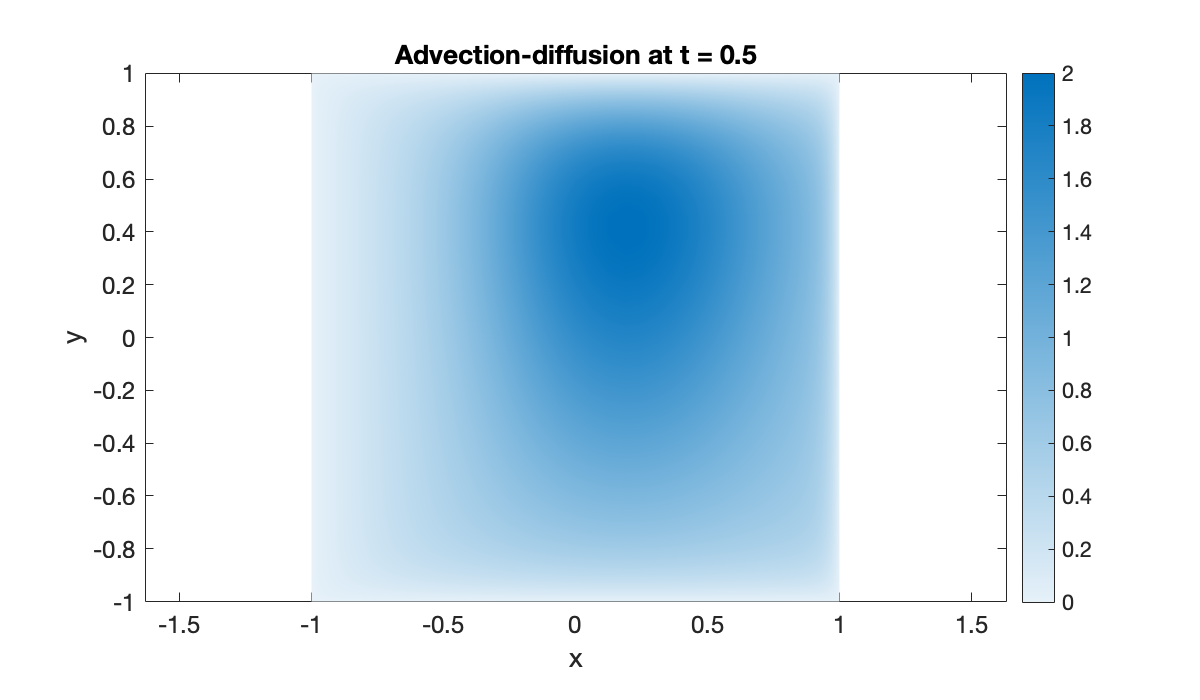

In [5]:
U = @(t) unpack(sol(t));

clf,  pcolor(X', Y', U(0.5)')
clim([0, 2]), shading interp
axis equal,  colormap(sky), colorbar
title('Advection-diffusion at t = 0.5')  
xlabel('x'),  ylabel('y')  

In [6]:
hold on
vid = VideoWriter("figures/2d-advdiff.mp4","MPEG-4");
vid.Quality = 85;
open(vid);
for t = linspace(0, 2, 81)
    cla, pcolor(X', Y', U(t)')
    shading interp
    str = sprintf("t = %.2f", t);
    text(-1.5, 0.75, str, fontsize=14);
    writeVideo(vid, frame2im(getframe(gcf)));
end
close(vid)